In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
# CIFAR10 데이터 불러오기
tmptrainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
tmptestset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
# CIFAR10 데이터에서 훈련 고양이, 강아지 이미지 저장하기
CAT_VALUE = 3
DOG_VALUE = 5
for num, value in enumerate(tmptrainset):
    data, label = value
#     print(num, data, label)
    
    if(label == CAT_VALUE):
        data.save('train_data/cat/%d_%d.jpeg'%(num, label))
    elif(label == DOG_VALUE):
        data.save('train_data/dog/%d_%d.jpeg'%(num, label))
        
for num, value in enumerate(tmptestset):
    data, label = value
#     print(num, data, label)
    
    if(label == CAT_VALUE):
        data.save('test_data/cat/%d_%d.jpeg'%(num, label))
    elif(label == DOG_VALUE):
        data.save('test_data/dog/%d_%d.jpeg'%(num, label))

print('end!!')    

end!!


In [12]:
# 학습에 사용할 파라미터를 설정
learning_rate = 0.001
training_epochs = 5
batch_size = 100

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='train_data/', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='test_data/', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('cat','dog')

In [14]:
len(trainset), len(testset)

(10000, 2000)

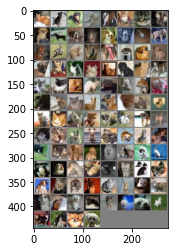

  cat   dog   dog   dog


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
import torch.nn as nn
import torch.nn.functional as F



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        
        self.fc1 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        print(x.shape)
        out = self.layer1(x)
        print(out.shape)
        out = self.layer2(out)
        print(out.shape)
#         out = self.layer3(out)
#         print(out.shape)
        out = out.view(out.shape[0], -1)
        print(out.shape)
        out = self.fc1(out)
        return out

In [17]:
# Model 정의
device = 'cpu'
model = CNN()
#testing 
test_input = (torch.Tensor(100,3,32,32)).to(device) # 16, 13, 29
test_out = model(test_input)

torch.Size([100, 3, 32, 32])
torch.Size([100, 6, 14, 14])
torch.Size([100, 16, 5, 5])
torch.Size([100, 400])


In [18]:
import torch.nn as nn
import torch.nn.functional as F



class CNNDeep(nn.Module):
    def __init__(self):
        super(CNNDeep, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        
        self.fc1 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU()
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(120, 60),
            nn.ReLU(),
            nn.Linear(60,2)
        )
        
        
    def forward(self, x):
#         print(x.shape)
        out = self.layer1(x)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = out.view(out.shape[0], -1)
#         print(out.shape)
        out = self.fc1(out)
#         print(out.shape)
        out = self.fc2(out)
        return out

In [19]:
# Model 정의
device = 'cpu'
model = CNNDeep()
#testing 
test_input = (torch.Tensor(100,3,32,32)).to(device) # 16, 13, 29
test_out = model(test_input)

In [20]:
import torch.optim as optim

loss_func  = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.005)

In [21]:
total_batch = len(trainloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 100


In [22]:
epochs = 5
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(trainloader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')

[Epoch:1] cost = 0.6929168701171875
[Epoch:2] cost = 0.6863802671432495
[Epoch:3] cost = 0.6933494210243225
[Epoch:4] cost = 0.6933831572532654
[Epoch:5] cost = 0.6937941908836365
Learning Finished!


In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %
